<a href="https://colab.research.google.com/github/santhosh0135/Library-Management-System-SQL-/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pydotplus
import pydot
import zipfile
# Path to the zip file
zip_file_path = '/content/Dataset (CNN Project).zip'
extract_path = '/content/extracted_folder/'

# Unzip the file
os.makedirs(extract_path, exist_ok=True)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print(f'Files extracted to {extract_path}')
print(os.listdir(extract_path))

Files extracted to /content/extracted_folder/
['Dataset 2', '__MACOSX']


In [3]:
# Paths to train, test, and validation directories
base_dir = '/content/extracted_folder'
train_dir = os.path.join(base_dir,'/content/extracted_folder/Dataset 2/Train')
valid_dir = os.path.join(base_dir, '/content/extracted_folder/Dataset 2/Valid')
test_dir = os.path.join(base_dir, '/content/extracted_folder/Dataset 2/Test')
# Data generators
train_datagen = ImageDataGenerator(rescale=1.0/255.)
valid_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='binary', target_size=(224, 224))
validation_generator = valid_datagen.flow_from_directory(valid_dir, batch_size=100, class_mode='binary', target_size=(224, 224))
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='binary', target_size=(224, 224))
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1064, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

tf.keras.utils.pydot = pydot
plot_model(model, to_file='model.png', show_shapes=True)
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Found 20 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1064)           │    92,066,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         2,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 92,162,234 (351.57 MB)

 Trainable params: 92,162,234 (351.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.7500 - loss: 0.5415 - val_accuracy: 0.6875 - val_loss: 0.5481
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7500 - loss: 0.5182 - val_accuracy: 0.6250 - val_loss: 0.5936
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6500 - loss: 0.5458 - val_accuracy: 0.5625 - val_loss: 0.5372
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6500 - loss: 0.4950 - val_accuracy: 0.8750 - val_loss: 0.4938
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.9000 - loss: 0.4477 - val_accuracy: 0.7500 - val_loss: 0.4956
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8000 - loss: 0.4436 - val_accuracy: 0.7500 - val_loss: 0.4722
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8000 - loss: 0.4173 - val_accuracy: 0.8125 - val_loss: 0.4498
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.8500 - loss: 0.3924 - val_accuracy: 0.8750 - val_loss: 0.4250
Epoch 9/15
1/1 ━

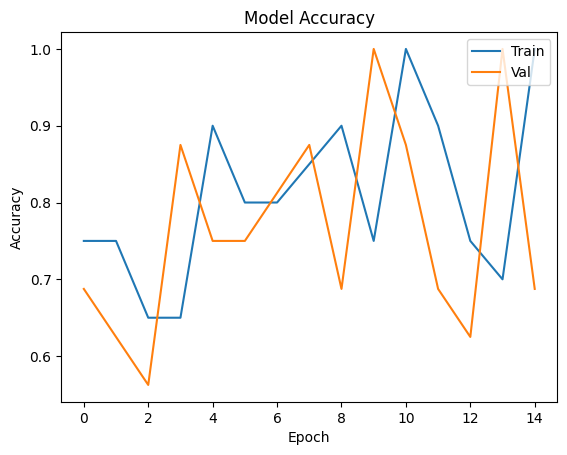

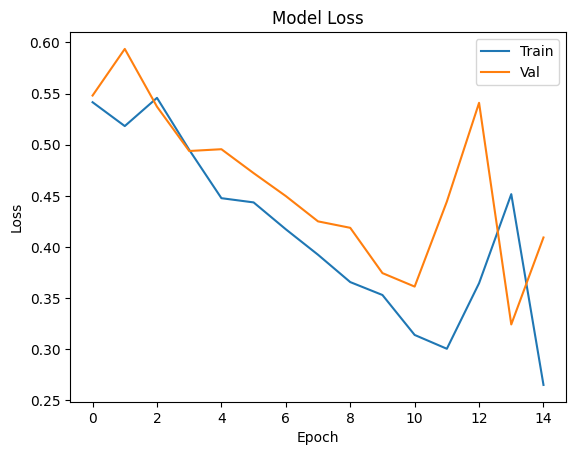

In [5]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    validation_steps=50,
    verbose=1
)

# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


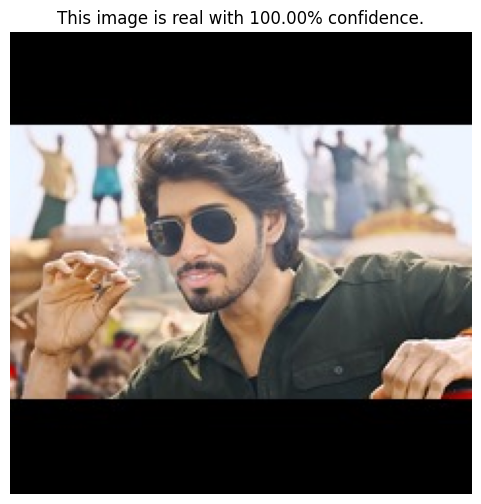

In [7]:
# Class names
class_names = ['fake', 'real']

from tensorflow.keras.utils import load_img, img_to_array

# Load and predict on a test image
test_image_path ='/content/extracted_folder/Dataset 2/Test/Fake/Babu09.jpg'
test_image = load_img(test_image_path, target_size=(224, 224))
test_image_array = img_to_array(test_image)
test_image_array = np.expand_dims(test_image_array, axis=0)

result = model.predict(test_image_array)
predicted_class = np.argmax(result)
confidence = 100 * np.max(result)

# Display the image with prediction
plt.figure(figsize=(6, 6))
plt.imshow(test_image)
plt.title(f"This image is {class_names[predicted_class]} with {confidence:.2f}% confidence.")
plt.axis("off")
plt.show()